In [25]:
import numpy as np
import cv2 
import face_recognition as fr
import matplotlib.pyplot as plt
import cv2

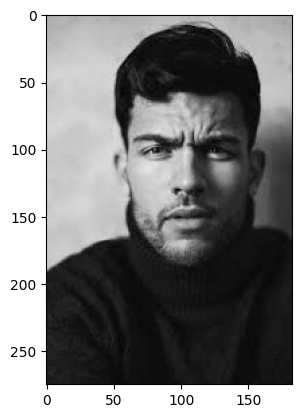

In [26]:
image = cv2.imread('D:\Masooma\Masooma Uni\Superior University\Semester 4\Programming for Artificial intelligence\Task 6\project\images\image.jpeg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.axis('on') 
plt.show()

In [27]:
from PIL import Image

img = Image.open("D:\Masooma\Masooma Uni\Superior University\Semester 4\Programming for Artificial intelligence\Task 6\project\images\image.jpeg")
if img.mode != "RGB":
    img = img.convert("RGB")
img.save("converted_image.png")
converted_image = cv2.imread("converted_image.png")

In [28]:
def measure_face(image):
    image = cv2.imread(image)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if isinstance(image, np.ndarray) else image
    f_landmarks_list = fr.face_landmarks(rgb_image)
    if not f_landmarks_list:
        print("No face detected.")
        return
    face_landmarks = f_landmarks_list[0]
    left_eye = np.array(face_landmarks['left_eye'])
    right_eye = np.array(face_landmarks['right_eye'])
    nose_bridge = np.array(face_landmarks['nose_bridge'])
    chin = np.array(face_landmarks['chin'])
    left_ear = np.array([chin[0], chin[1], chin[2]])  
    right_ear = np.array([chin[-1], chin[-2], chin[-3]])  
    eye_width = np.linalg.norm(left_eye[0] - left_eye[3])
    nose_length = np.linalg.norm(nose_bridge[0] - nose_bridge[-1])
    jaw_width = np.linalg.norm(chin[0] - chin[-1])
    left_ear_width = np.linalg.norm(left_ear[0] - left_ear[-1])
    right_ear_width = np.linalg.norm(right_ear[0] - right_ear[-1])
    trustworthiness = "Trustworthy" if abs(left_ear_width - right_ear_width) < 5 and eye_width > nose_length * 0.5 else "Untrustworthy"
    for feature in face_landmarks.keys():
        points = np.array(face_landmarks[feature])
        for point in points:
            cv2.circle(rgb_image, tuple(point), 7, (0, 255, 0), -1)  
    plt.figure(figsize=(8, 6))  
    plt.imshow(rgb_image)
    plt.title("Detected Face with Landmarks")
    plt.axis("on")
    plt.show()
    print(f"Person is: {trustworthiness}")
    print(f"Nose Length: {nose_length:.2f} pixels")
    print(f"Jaw Width: {jaw_width:.2f} pixels")
    print(f"Eye Width: {eye_width:.2f} pixels")
    print(f"Right Ear Width: {right_ear_width:.2f} pixels")
    print(f"Left Ear Width: {left_ear_width:.2f} pixels")

In [31]:
image_path = 'D:\Masooma\Masooma Uni\Superior University\Semester 4\Programming for Artificial intelligence\Task 6\project\images\image.jpeg'